# Neural Network (nn)

[Edward Lu](https://github.com/edwardlu71/notebooks)

### Example: Logistic Regression

#### Supervised Learning
the machine learning task of learning a function that maps an input to a desired output based on example input-output pairs.


### From Linear Regression to Logistic Regression

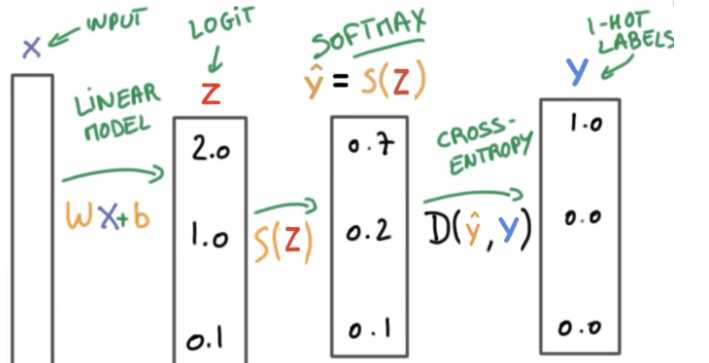

#### softmax

It is activation function to convert input to probabilty % which can sum up to 100%
$$ \sigma(z_{i}) = \frac{e^{z_{i}}}{\sum_{j=1}^{K}e^{z_{i}}} $$

propety of the function, same as sigmoid function for linear regression

$$ \sigma'(z) = \sigma(1-\sigma) $$

Loss on softmas output

$$ L_{i} = -log(\sigma(z_{i})) $$


#### Cross-Entropy Loss

Function to measure the distance between prediction (probabilties) and expected value (logistic) ~ compared with least mean square function for linear regression

$$ H(p,q) = - \sum_{i} p_{i}log(q_{I}) $$

$ p_{i} $ from expected value; $ q_{i} $ from softmax output


#### 


In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [32]:
# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)
print(bc.keys())
print(bc.feature_names)

569 30
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [40]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [48]:
bc.target.shape

(569,)

In [49]:
from pprint import pprint

pprint(bc)

{'DESCR': '.. _breast_cancer_dataset:\n'
          '\n'
          'Breast cancer wisconsin (diagnostic) dataset\n'
          '--------------------------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 569\n'
          '\n'
          '    :Number of Attributes: 30 numeric, predictive attributes and '
          'the class\n'
          '\n'
          '    :Attribute Information:\n'
          '        - radius (mean of distances from center to points on the '
          'perimeter)\n'
          '        - texture (standard deviation of gray-scale values)\n'
          '        - perimeter\n'
          '        - area\n'
          '        - smoothness (local variation in radius lengths)\n'
          '        - compactness (perimeter^2 / area - 1.0)\n'
          '        - concavity (severity of concave portions of the contour)\n'
          '        - concave points (number of concave portions of the '
       

In [8]:
# something like random.shuffle()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [9]:
# standard scaler. always recommended to deal with logistic regression. It make the features zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [10]:
# one row data transformed to one column data
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [15]:
# 1) model
# f = w*x + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        # expect only one output feature
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)  # 30 features from this dataset

In [16]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()    # binary cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
# 3) training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # prediction = forward pass and loss
    y_predicted = model(X_train)
    # loss
    loss = criterion(y_predicted, y_train)

    # gradient = backward pass
    loss.backward() #dLoss/dWeight

    # update weights
    optimizer.step()

    # zero gradients, clean up
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"epoch {epoch}: loss = {loss.item():.4f}")

epoch 0: loss = 0.4498
epoch 10: loss = 0.3879
epoch 20: loss = 0.3455
epoch 30: loss = 0.3145
epoch 40: loss = 0.2907
epoch 50: loss = 0.2718
epoch 60: loss = 0.2564
epoch 70: loss = 0.2435
epoch 80: loss = 0.2325
epoch 90: loss = 0.2230
epoch 100: loss = 0.2146
epoch 110: loss = 0.2072
epoch 120: loss = 0.2006
epoch 130: loss = 0.1946
epoch 140: loss = 0.1892
epoch 150: loss = 0.1842
epoch 160: loss = 0.1797
epoch 170: loss = 0.1755
epoch 180: loss = 0.1716
epoch 190: loss = 0.1680
epoch 200: loss = 0.1646
epoch 210: loss = 0.1614
epoch 220: loss = 0.1585
epoch 230: loss = 0.1557
epoch 240: loss = 0.1530
epoch 250: loss = 0.1506
epoch 260: loss = 0.1482
epoch 270: loss = 0.1460
epoch 280: loss = 0.1438
epoch 290: loss = 0.1418
epoch 300: loss = 0.1399
epoch 310: loss = 0.1381
epoch 320: loss = 0.1363
epoch 330: loss = 0.1346
epoch 340: loss = 0.1330
epoch 350: loss = 0.1315
epoch 360: loss = 0.1300
epoch 370: loss = 0.1286
epoch 380: loss = 0.1272
epoch 390: loss = 0.1259
epoch 400: 

In [18]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
    print(f"accuracy = {acc:.4f}")

accuracy = 0.9386


In [35]:
y_predicted

tensor([[8.8421e-01],
        [9.9843e-01],
        [7.1482e-01],
        [9.8389e-01],
        [9.6420e-01],
        [7.5578e-01],
        [3.9537e-01],
        [9.9566e-01],
        [8.8881e-04],
        [6.5127e-04],
        [1.1335e-03],
        [8.5527e-01],
        [9.6323e-01],
        [7.1003e-01],
        [9.7513e-01],
        [1.3017e-06],
        [9.9782e-01],
        [9.9776e-01],
        [9.8530e-01],
        [2.3712e-02],
        [9.4790e-01],
        [1.0420e-01],
        [1.3714e-04],
        [2.6578e-06],
        [1.0729e-03],
        [9.3057e-01],
        [3.7939e-01],
        [9.9105e-01],
        [9.9810e-01],
        [9.9654e-01],
        [9.7419e-01],
        [9.9193e-01],
        [9.7722e-04],
        [9.0251e-01],
        [9.3057e-01],
        [7.0476e-01],
        [9.9571e-01],
        [3.2247e-02],
        [7.6348e-01],
        [9.9197e-01],
        [1.1465e-02],
        [9.8084e-01],
        [4.2590e-03],
        [8.5862e-01],
        [8.1474e-01],
        [9